# **1. Import Library**

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# **2. Read Dataset**

In [82]:
#Membaca dataset dari file CSV
digits = pd.read_csv("digits.csv")

#Menampilkan informasi dan 5 baris pertama data
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target
0,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
1,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
2,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
3,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
4,0,0,12,10,0,0,0,0,0,0,...,0,0,0,9,16,16,10,0,0,5


In [83]:
#Menampilkan ringkasan singkat tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   pixel_0   1796 non-null   int64
 1   pixel_1   1796 non-null   int64
 2   pixel_2   1796 non-null   int64
 3   pixel_3   1796 non-null   int64
 4   pixel_4   1796 non-null   int64
 5   pixel_5   1796 non-null   int64
 6   pixel_6   1796 non-null   int64
 7   pixel_7   1796 non-null   int64
 8   pixel_8   1796 non-null   int64
 9   pixel_9   1796 non-null   int64
 10  pixel_10  1796 non-null   int64
 11  pixel_11  1796 non-null   int64
 12  pixel_12  1796 non-null   int64
 13  pixel_13  1796 non-null   int64
 14  pixel_14  1796 non-null   int64
 15  pixel_15  1796 non-null   int64
 16  pixel_16  1796 non-null   int64
 17  pixel_17  1796 non-null   int64
 18  pixel_18  1796 non-null   int64
 19  pixel_19  1796 non-null   int64
 20  pixel_20  1796 non-null   int64
 21  pixel_21  1796 non-null   int64
 22  

# **3. Preprocessing Data**

In [84]:
#Asumsi: Kolom terakhir adalah label (target), dan sisanya adalah fitur
X = digits.iloc[:, :-1]
y = digits.iloc[:, -1]

#Membagi dataset menjadi training set (80%) dan test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **4. Train Model (Support Vector Machine)**

In [85]:
model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True, random_state=42)

# **5. Model Evaluation**

In [89]:
#Prediksi pada data uji
y_pred = model.predict(X_test_scaled)

#Evaluasi hasil
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))
print("Matriks Kebingungan:")
print(confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy * 100:.2f}%")


Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        34
           5       0.95      1.00      0.97        39
           6       1.00      1.00      1.00        45
           7       1.00      0.97      0.99        35
           8       1.00      1.00      1.00        29
           9       1.00      0.98      0.99        45

    accuracy                           0.99       360
   macro avg       1.00      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Matriks Kebingungan:
[[29  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  0]


# **6. Visualisasi Digit Pertama**

<Figure size 640x480 with 0 Axes>

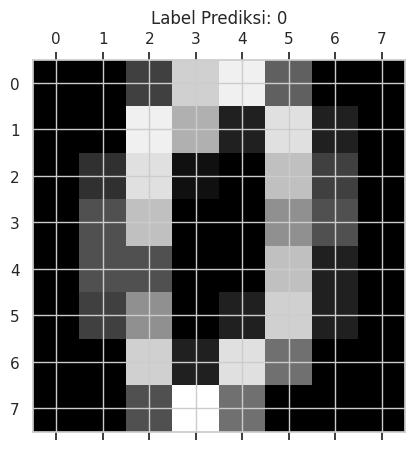

In [92]:
plt.gray()
plt.matshow(X_test.iloc[0].values.reshape(8, 8))
plt.title(f'Label Prediksi: {y_pred[0]}')
plt.show()